In [1]:
import numpy as np
import cmdstanpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import arviz as az
import pandas as pd

In [2]:
df = pd.read_csv('./mon.csv')
df['subn'] = df['sub'].rank(method='dense').astype(int)
df = df.dropna().sort_values('subn')

refValue = 5
refProbability = 1
refAmbiguity = 1

seed = 10112015

In [3]:
N = df.shape[0]
choice = df['choice'].astype(int)
refProbabilities = np.repeat(refProbability, N)
refValues=np.repeat(refValue, N)
lotteryProbabilities = df['risk'].astype(float)
ID = df['subn'].astype('int')
lotteryValues = df['value'].astype('int')
n_sub = len(df['sub'].unique())+1

In [4]:
# define dictionary of data
standata_simple = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [5]:
simpleModel = cmdstanpy.CmdStanModel(stan_file='simpleModel.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
fit_simple_model = simpleModel.sample(
  data = standata_simple,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [7]:
fit_simple_model.draws(concat_chains=True).shape

(4000, 16713)

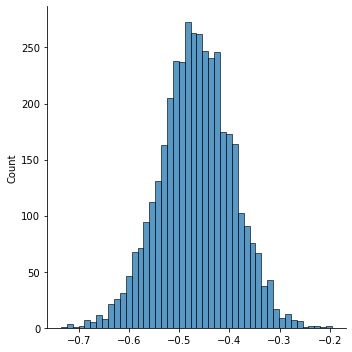

In [8]:
draws_rmu = fit_simple_model.stan_variable(var='rMu')
sns.displot(draws_rmu)

In [9]:
cmdstanpy_data = az.from_cmdstanpy(posterior=fit_simple_model)

In [10]:
az.summary(cmdstanpy_data, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.742,0.058,0.635,0.853,0.001,0.001,4480.0,2938.0,1.0
riskTol[1],0.146,0.029,0.087,0.198,0.000,0.000,3793.0,2294.0,1.0
riskTol[2],0.779,0.102,0.598,0.977,0.002,0.001,2953.0,2914.0,1.0
riskTol[3],0.275,0.044,0.196,0.356,0.001,0.001,4077.0,2324.0,1.0
riskTol[4],0.492,0.070,0.349,0.616,0.001,0.001,3110.0,1963.0,1.0
riskTol[5],0.306,0.039,0.235,0.378,0.001,0.000,4199.0,2178.0,1.0
riskTol[6],0.474,0.044,0.390,0.555,0.001,0.000,4366.0,2404.0,1.0
riskTol[7],0.713,0.060,0.606,0.828,0.001,0.001,3942.0,2630.0,1.0
riskTol[8],0.793,0.100,0.606,0.983,0.002,0.001,3204.0,2731.0,1.0
riskTol[9],0.548,0.040,0.478,0.628,0.001,0.000,4551.0,3046.0,1.0


In [11]:
AmbiguityModel = cmdstanpy.CmdStanModel(stan_file='AmbiguityModel.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
refAmbiguities = np.repeat(refAmbiguity, N)
lotteryAmbiguities = df['ambiguity'].astype(float)

In [13]:
# define dictionary of data
standata_ambiguity = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refAmbiguities' : refAmbiguities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'lotteryAmbiguities' : lotteryAmbiguities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [14]:
fit_ambiguity_model = AmbiguityModel.sample(
  data = standata_ambiguity,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [15]:
cmdstanpy_data_amb = az.from_cmdstanpy(posterior=fit_ambiguity_model)

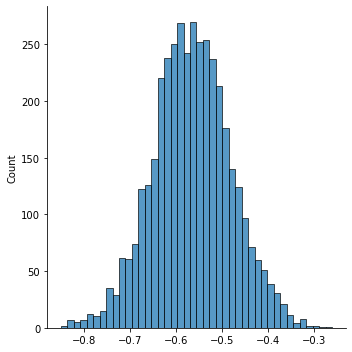

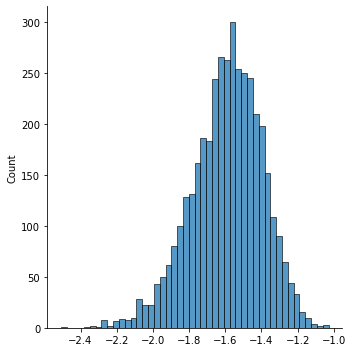

In [16]:
draws_rmu = fit_ambiguity_model.stan_variable(var='aMu')
draws_bmu = fit_ambiguity_model.stan_variable(var='bMu')
sns.displot(draws_rmu)
sns.displot(draws_bmu)

In [17]:
az.summary(cmdstanpy_data_amb, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.708,0.057,0.602,0.816,0.001,0.001,5408.0,3042.0,1.0
riskTol[1],0.121,0.028,0.071,0.176,0.000,0.000,4075.0,2522.0,1.0
riskTol[2],0.660,0.100,0.466,0.843,0.002,0.001,3944.0,2624.0,1.0
riskTol[3],0.243,0.048,0.155,0.336,0.001,0.001,4806.0,2252.0,1.0
riskTol[4],0.404,0.070,0.268,0.528,0.001,0.001,3821.0,2991.0,1.0
riskTol[5],0.239,0.054,0.135,0.332,0.001,0.001,4015.0,2792.0,1.0
riskTol[6],0.454,0.046,0.366,0.540,0.001,0.000,5723.0,2723.0,1.0
riskTol[7],0.651,0.053,0.553,0.752,0.001,0.001,4999.0,3161.0,1.0
riskTol[8],0.702,0.101,0.516,0.897,0.002,0.001,4270.0,3085.0,1.0
riskTol[9],0.509,0.036,0.442,0.578,0.001,0.000,5147.0,2660.0,1.0


In [18]:
az.summary(cmdstanpy_data_amb, var_names=['ambTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ambTol[0],0.152,0.085,0.015,0.303,0.001,0.001,4106.0,2295.0,1.0
ambTol[1],0.077,0.047,0.006,0.162,0.001,0.001,3731.0,3139.0,1.0
ambTol[2],0.630,0.207,0.206,0.987,0.004,0.003,2906.0,1673.0,1.0
ambTol[3],0.100,0.061,0.011,0.214,0.001,0.001,3844.0,2576.0,1.0
ambTol[4],0.513,0.161,0.200,0.808,0.003,0.002,2909.0,1476.0,1.0
ambTol[5],0.228,0.102,0.040,0.405,0.002,0.001,3257.0,2384.0,1.0
ambTol[6],0.117,0.072,0.009,0.249,0.001,0.001,3815.0,2798.0,1.0
ambTol[7],0.371,0.121,0.140,0.597,0.002,0.002,3296.0,1551.0,1.0
ambTol[8],0.379,0.195,0.029,0.709,0.003,0.002,3107.0,2614.0,1.0
ambTol[9],0.267,0.094,0.094,0.444,0.002,0.001,3523.0,2236.0,1.0


In [19]:
AmbiguityModel_p = cmdstanpy.CmdStanModel(stan_file='AmbiguityModel_priors.stan')

INFO:cmdstanpy:compiling stan file /home/nachshon/Documents/Aging/Aging/RiskandAmbiguity/AmbiguityModel_priors.stan to exe file /home/nachshon/Documents/Aging/Aging/RiskandAmbiguity/AmbiguityModel_priors
INFO:cmdstanpy:compiled model executable: /home/nachshon/Documents/Aging/Aging/RiskandAmbiguity/AmbiguityModel_priors


In [20]:
fit_ambiguity_model_info_prior = AmbiguityModel_p.sample(
  data = standata_ambiguity,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [21]:
cmdstanpy_data_amb_info_prior = az.from_cmdstanpy(posterior=fit_ambiguity_model_info_prior)

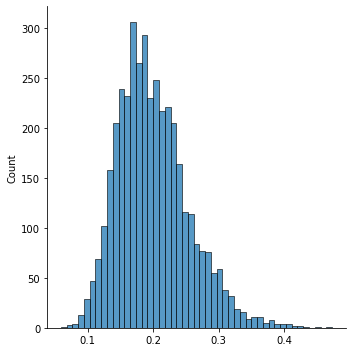

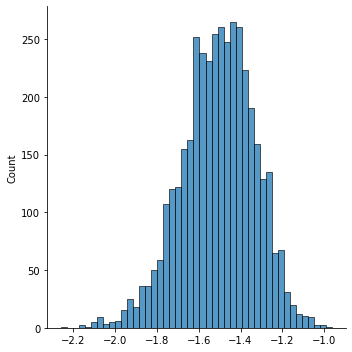

In [22]:
draws_amu_ip = fit_ambiguity_model_info_prior.stan_variable(var='aMu')
draws_bmu_ip = fit_ambiguity_model_info_prior.stan_variable(var='bMu')
sns.displot(draws_amu_ip)
sns.displot(draws_bmu_ip)

In [23]:
az.summary(cmdstanpy_data_amb_info_prior, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.712,0.060,0.603,0.825,0.001,0.001,4436.0,3212.0,1.0
riskTol[1],0.093,0.033,0.031,0.150,0.001,0.000,3305.0,2259.0,1.0
riskTol[2],0.678,0.104,0.467,0.862,0.002,0.001,2995.0,2368.0,1.0
riskTol[3],0.226,0.053,0.127,0.323,0.001,0.001,3843.0,2160.0,1.0
riskTol[4],0.401,0.077,0.258,0.546,0.002,0.001,2648.0,2465.0,1.0
riskTol[5],0.214,0.061,0.100,0.327,0.001,0.001,2306.0,2025.0,1.0
riskTol[6],0.453,0.047,0.357,0.534,0.001,0.001,3566.0,1815.0,1.0
riskTol[7],0.653,0.053,0.559,0.759,0.001,0.001,3750.0,2852.0,1.0
riskTol[8],0.725,0.107,0.535,0.932,0.002,0.001,2897.0,2608.0,1.0
riskTol[9],0.509,0.036,0.443,0.579,0.001,0.000,4581.0,2987.0,1.0


In [24]:
az.summary(cmdstanpy_data_amb_info_prior, var_names=['ambTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ambTol[0],0.156,0.084,0.020,0.311,0.001,0.001,3205.0,2178.0,1.0
ambTol[1],0.100,0.059,0.008,0.209,0.001,0.001,2670.0,1958.0,1.0
ambTol[2],0.623,0.209,0.209,0.998,0.004,0.003,2662.0,1510.0,1.0
ambTol[3],0.113,0.065,0.006,0.226,0.001,0.001,2583.0,1811.0,1.0
ambTol[4],0.520,0.163,0.219,0.834,0.003,0.002,2945.0,1899.0,1.0
ambTol[5],0.263,0.109,0.048,0.452,0.002,0.002,1843.0,1482.0,1.0
ambTol[6],0.121,0.071,0.013,0.247,0.001,0.001,2778.0,2206.0,1.0
ambTol[7],0.373,0.116,0.161,0.597,0.002,0.002,2592.0,1427.0,1.0
ambTol[8],0.369,0.200,0.025,0.713,0.004,0.003,2727.0,2183.0,1.0
ambTol[9],0.273,0.091,0.096,0.437,0.002,0.001,3318.0,1822.0,1.0


In [40]:
az.compare({'informed':fit_ambiguity_model_info_prior, 'uninformed':fit_ambiguity_model})

TypeError: Encountered error trying to compute loo from model informed.